In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#no null values

In [7]:
#checking unique values
for i in df.columns:
    print(df[i].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' P

In [8]:
#there are ' ?' in datasets that needs to be preprocesses
df=df.replace(' ?',np.NaN)

In [9]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
for i in ['Workclass','Occupation','Native_country']:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
cat_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)
cat_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

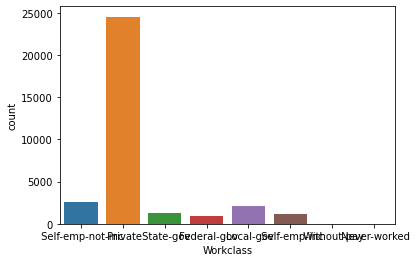

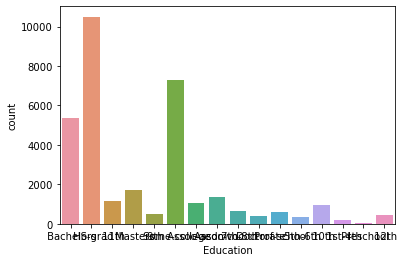

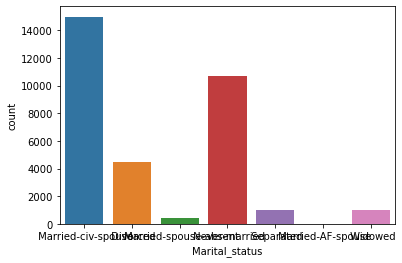

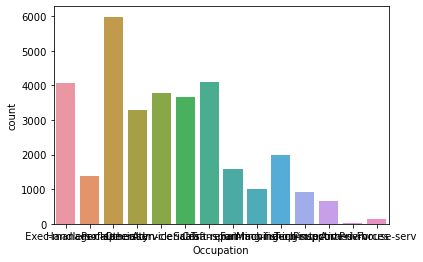

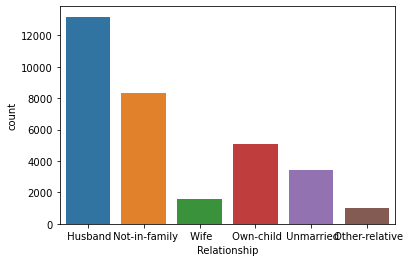

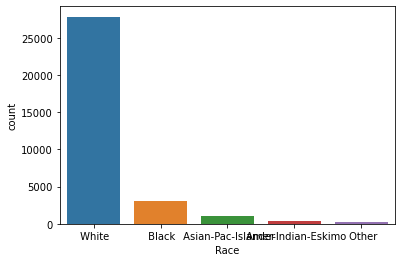

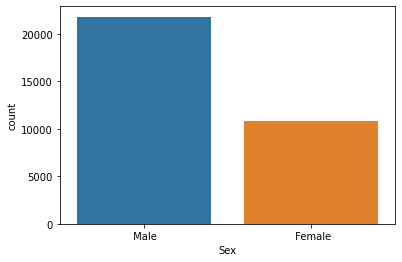

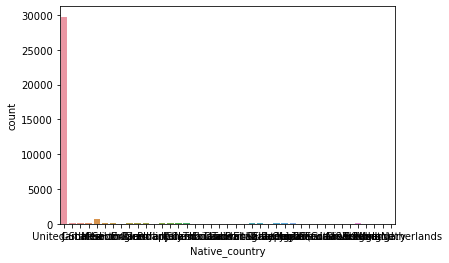

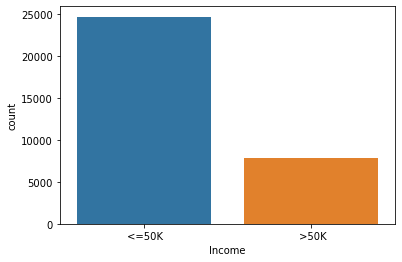

In [13]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

In [14]:
#native country is mainly US because we have filled all ' ?' with most frequent value
#Workclass is mainly private because we have filled all ' ?' with most frequent value
#Occupation also

In [16]:
#Outcome i.e Income count is not same we can under sample.

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [19]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [20]:
#data is highly spreaded for Age,Education,Capital_Gain,Capital_loss,Hours_per_week and native Country

In [21]:
#capital gain and lost is mostly 0 and maximum values in the fourth quartile

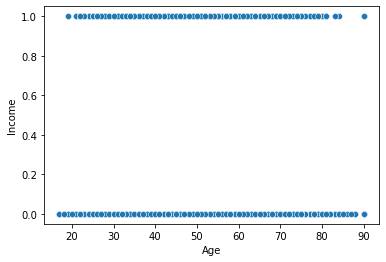

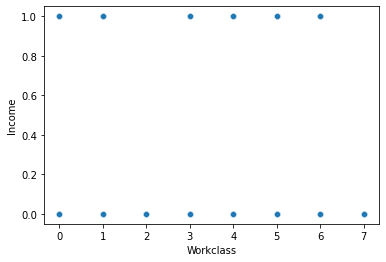

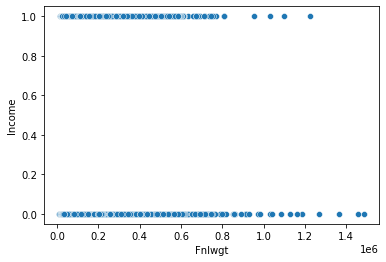

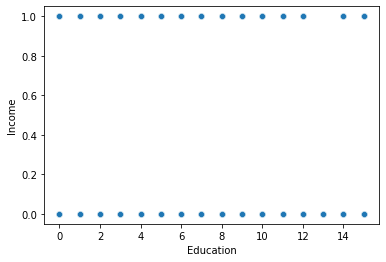

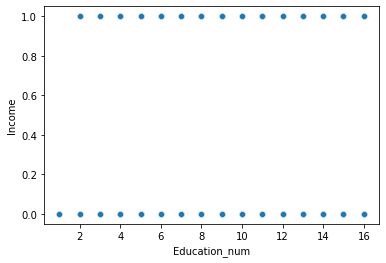

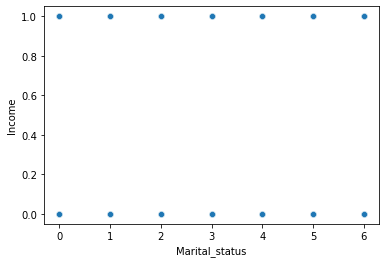

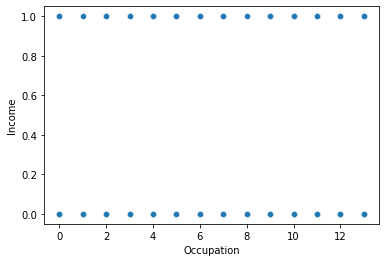

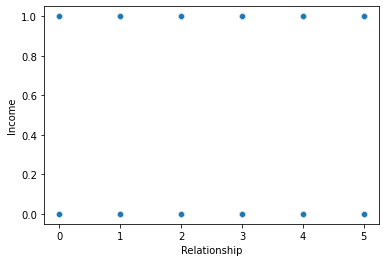

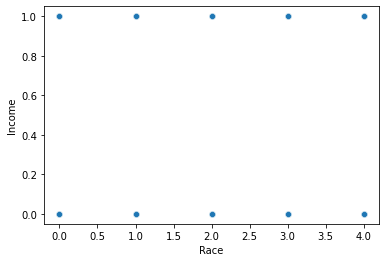

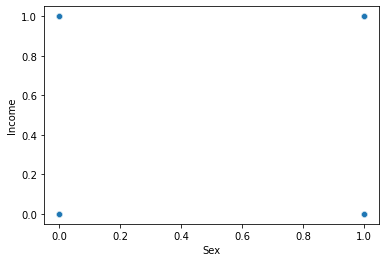

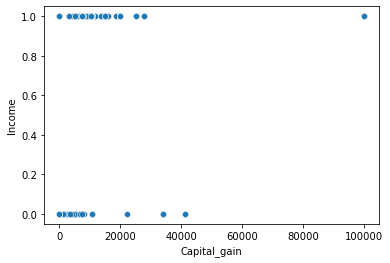

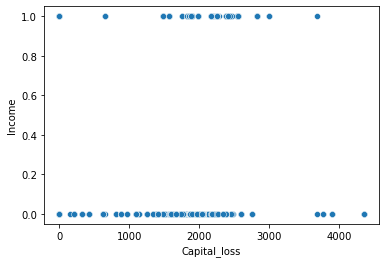

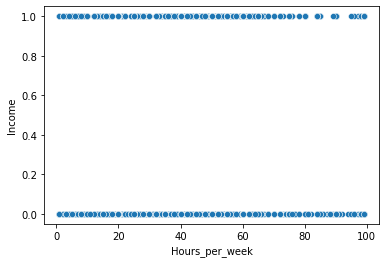

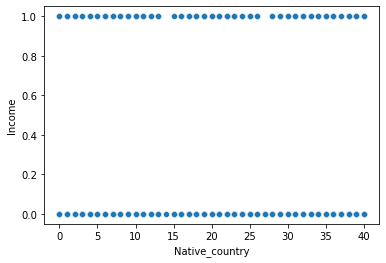

In [22]:
cols=df.columns
for i in cols[:-1]:
    sns.scatterplot(x=df[i],y=df['Income'])
    plt.show()

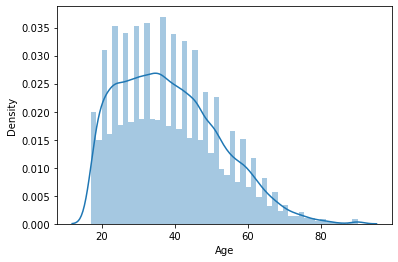

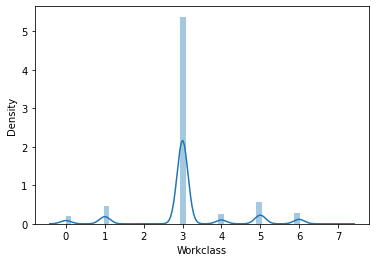

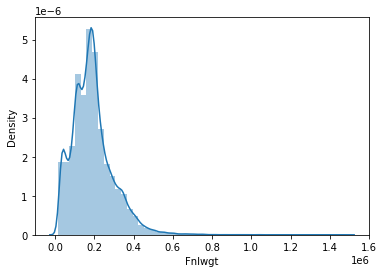

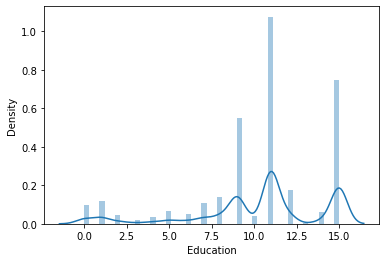

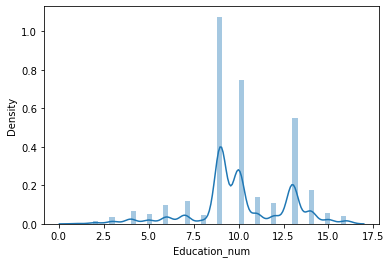

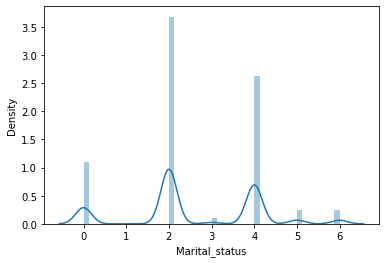

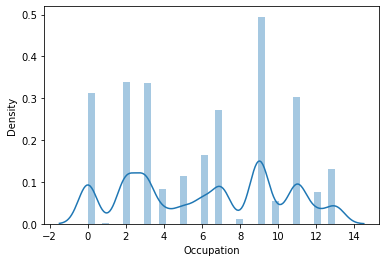

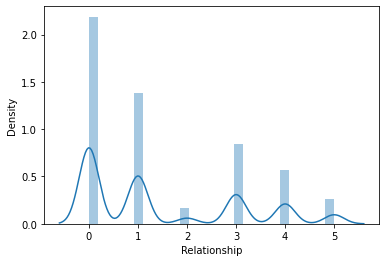

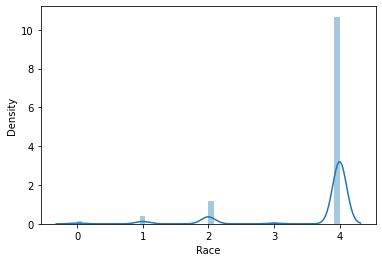

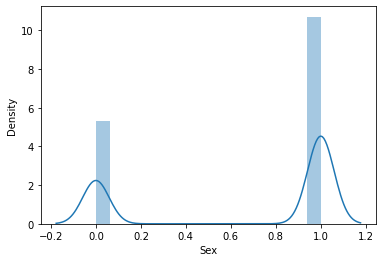

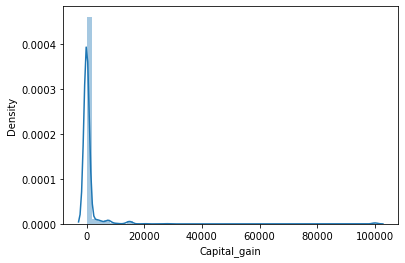

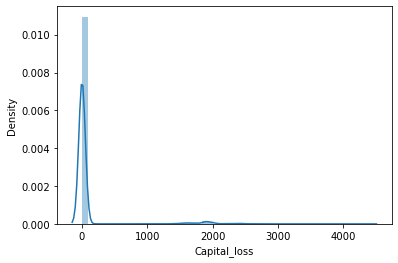

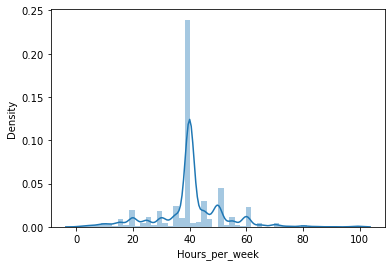

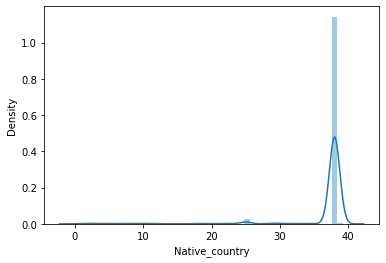

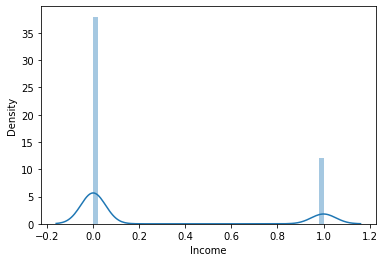

In [23]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

In [24]:
#data is hightly skewed

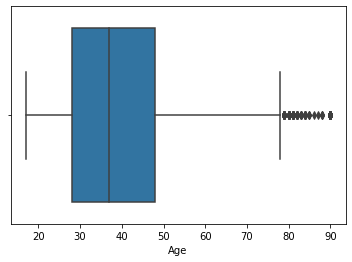

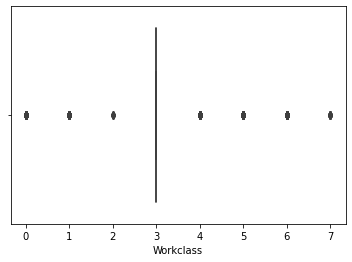

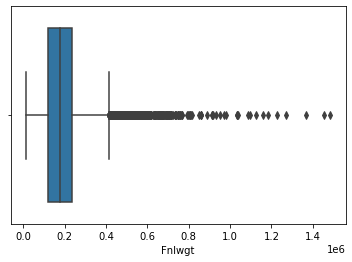

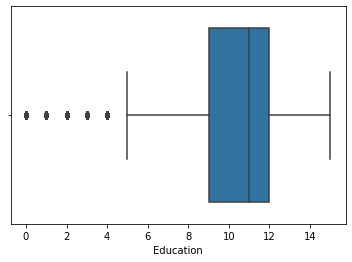

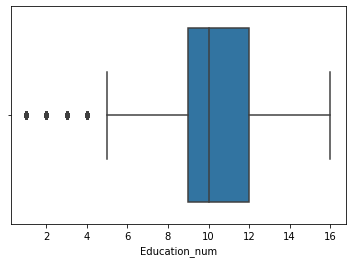

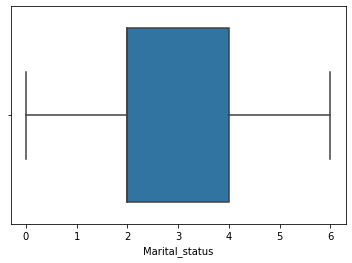

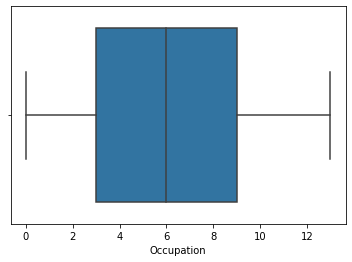

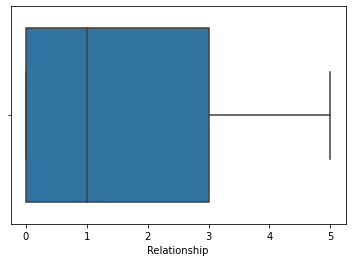

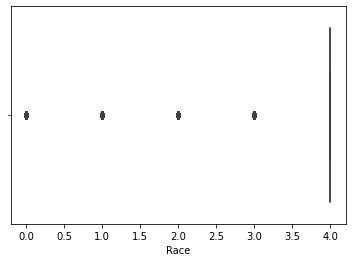

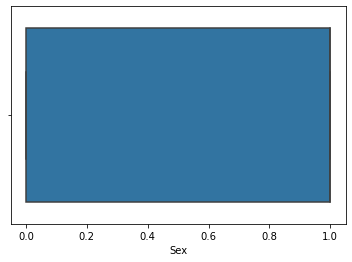

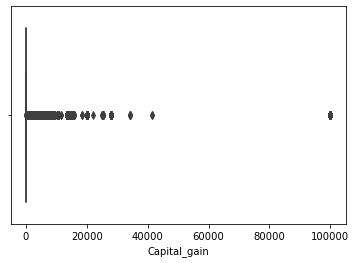

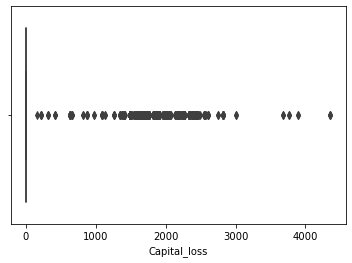

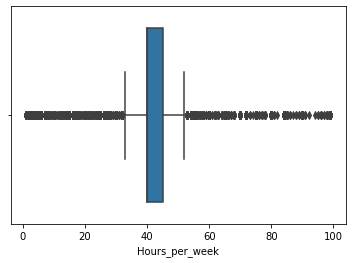

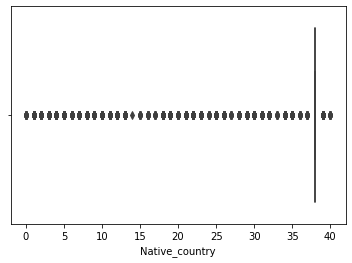

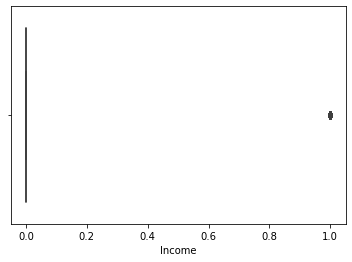

In [25]:
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [26]:
#data is having a lot of outliers

In [27]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

In [28]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


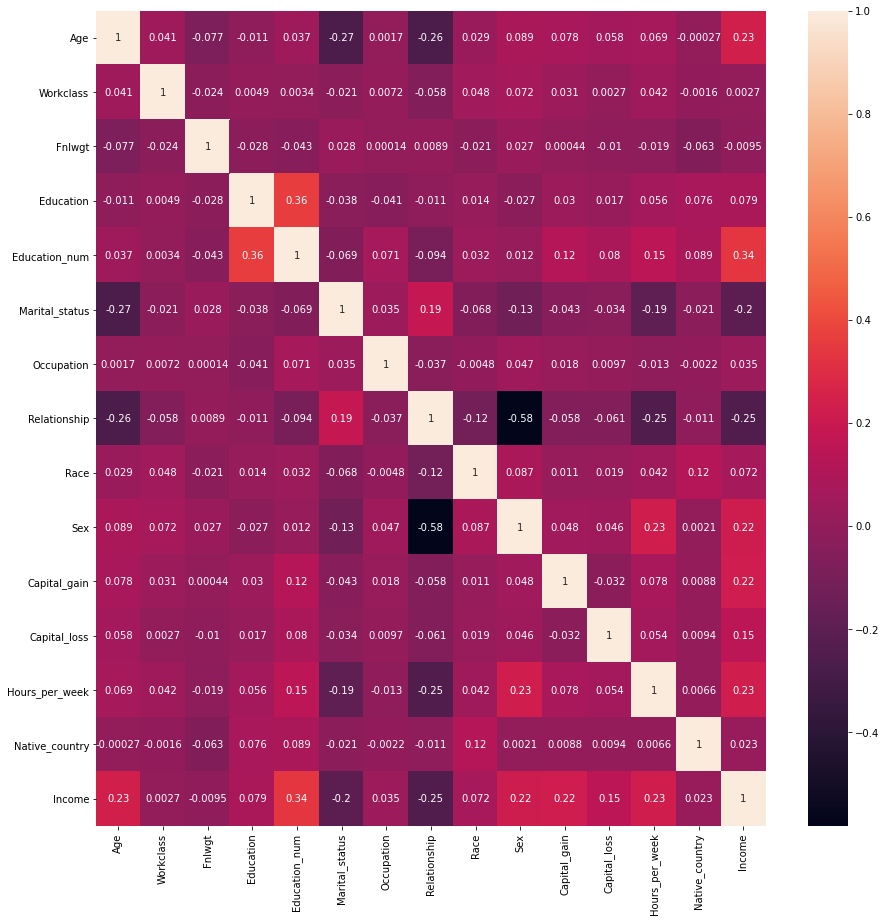

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

Checking multicolinearilty

In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif['VIF Factor']=[viff(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [31]:
calc_vif(x)

,variables,VIF Factor
0,Age,8.852061
1,Workclass,8.436963
2,Fnlwgt,4.042267
3,Education,9.232442
4,Education_num,18.725639
5,Marital_status,4.079516
6,Occupation,3.386222
7,Relationship,2.673815
8,Race,17.894320
9,Sex,4.498016


In [32]:
pd.DataFrame([df['Education'],df['Education_num']])

,0,1,2,3,4,5,6,7,8,9,...,32550,32551,32552,32553,32554,32555,32556,32557,32558,32559
Education,9,11,1,9,12,6,11,12,9,15,...,0,8,12,12,15,7,11,11,11,11
Education_num,13,9,7,13,14,5,9,14,13,10,...,6,11,14,14,10,12,9,9,9,9


In [33]:
df.drop(['Education_num'],inplace=True,axis=1)

In [34]:
calc_vif(df.iloc[:,:-1])

,variables,VIF Factor
0,Age,8.760393
1,Workclass,8.416488
2,Fnlwgt,4.037630
3,Education,7.783511
4,Marital_status,4.066866
5,Occupation,3.330143
6,Relationship,2.673280
7,Race,17.709923
8,Sex,4.497816
9,Capital_gain,1.035333


In [35]:
#Native Country is also very colinear
df.drop(['Native_country'],axis=1,inplace=True)

In [36]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,2,12,5,4,0,0,0,38,0
32556,40,3,154374,11,2,6,0,4,1,0,0,40,1
32557,58,3,151910,11,6,0,4,4,0,0,0,40,0
32558,22,3,201490,11,4,0,3,4,1,0,0,20,0


In [37]:
from scipy.stats import zscore
z=zscore(df)

In [38]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    df1=df.copy()
    df_new=df[(z<i).all(axis=1)]
    loss=((df1.shape[0]-df_new.shape[0])*100)/df1.shape[0]
    print ("At i",i," loss % is",loss)

At i 3  loss % is 7.57985257985258
At i 3.2  loss % is 7.186732186732187
At i 3.4  loss % is 6.486486486486487
At i 3.6  loss % is 5.964373464373464
At i 3.8  loss % is 5.11056511056511
At i 4.0  loss % is 4.723587223587224
At i 4.2  loss % is 4.201474201474201
At i 4.4  loss % is 3.977272727272727
At i 4.6  loss % is 2.6535626535626538
At i 4.8  loss % is 1.554054054054054


In [39]:
#Can take threshold as 3

In [40]:
df=df[(z<3).all(axis=1)]

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
x.shape

(30092, 12)

In [43]:
y.shape

(30092,)

In [44]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [45]:
x,y=nm.fit_resample(x,y)

In [46]:
x.shape

(13338, 12)

In [47]:
y.shape

(13338,)

In [49]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in df.columns:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))
    elif np.abs(df[i].skew())<-0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
lg=LogisticRegression()
x_train=x
y_train=y
x_test=x
y_test=y
acc=0
r_state=0
for i in (0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred=lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc=accuracy_score(t_y,pred)
        x_train=tr_x
        x_test=t_x
        y_train=tr_y
        y_test=t_y
        r_state=i
print("At random state",r_state,"accuracy score is maximum i.e.,",acc)

At random state 0 accuracy score is maximum i.e., 0.7166416791604198


In [53]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print("Accuracy score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification report\n",classification_report(y_test,pred))

In [54]:
fun(lg)

Accuracy score 0.7166416791604198
Confusion Matrix
 [[934 360]
 [396 978]]
Classification report
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      1294
           1       0.73      0.71      0.72      1374

    accuracy                           0.72      2668
   macro avg       0.72      0.72      0.72      2668
weighted avg       0.72      0.72      0.72      2668



In [55]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross val score",score)
    print(score.mean())

In [56]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd=GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [57]:
cvs(lg)

Cross val score [0.72413793 0.7173913  0.72413793 0.71953506 0.7127859 ]
0.7195976252593612


In [88]:
CVS=[71.95]
acc=[71.66]
model=['Logistic Regression']

In [59]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [61]:
from sklearn.svm import SVC
params_svc={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [62]:
svc=SVC(degree=3,gamma='scale',kernel='poly',shrinking=True)

In [63]:
fun(svc)
cvs(svc)

Accuracy score 0.7758620689655172
Confusion Matrix
 [[ 859  435]
 [ 163 1211]]
Classification report
               precision    recall  f1-score   support

           0       0.84      0.66      0.74      1294
           1       0.74      0.88      0.80      1374

    accuracy                           0.78      2668
   macro avg       0.79      0.77      0.77      2668
weighted avg       0.79      0.78      0.77      2668

Cross val score [0.78823088 0.78410795 0.78673163 0.78290214 0.78365204]
0.7851249290990051


In [89]:
acc.append(77.58)
CVS.append(78.51)
model.append('SVC')

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params_dtc={'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtc,dtc)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}


In [66]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2,splitter='best')
fun(dtc)
cvs(dtc)

Accuracy score 0.7732383808095952
Confusion Matrix
 [[ 875  419]
 [ 186 1188]]
Classification report
               precision    recall  f1-score   support

           0       0.82      0.68      0.74      1294
           1       0.74      0.86      0.80      1374

    accuracy                           0.77      2668
   macro avg       0.78      0.77      0.77      2668
weighted avg       0.78      0.77      0.77      2668

Cross val score [0.77398801 0.78935532 0.77548726 0.76040495 0.78815148]
0.7774774030307681


In [90]:
CVS.append(77.74)
acc.append(77.32)
model.append('Decision Tree')

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 11, 'weights': 'uniform'}


In [69]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=11,weights='uniform')

In [70]:
fun(knn)
cvs(knn)

Accuracy score 0.7874812593703149
Confusion Matrix
 [[1015  279]
 [ 288 1086]]
Classification report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1294
           1       0.80      0.79      0.79      1374

    accuracy                           0.79      2668
   macro avg       0.79      0.79      0.79      2668
weighted avg       0.79      0.79      0.79      2668

Cross val score [0.79085457 0.78485757 0.78523238 0.78627672 0.79415073]
0.7882743948610621


In [91]:
CVS.append(78.75)
acc.append(78.83)
model.append('K Neighbors')

In [72]:
fun(gb)
cvs(gb)

Accuracy score 0.5989505247376312
Confusion Matrix
 [[1294    0]
 [1070  304]]
Classification report
               precision    recall  f1-score   support

           0       0.55      1.00      0.71      1294
           1       1.00      0.22      0.36      1374

    accuracy                           0.60      2668
   macro avg       0.77      0.61      0.53      2668
weighted avg       0.78      0.60      0.53      2668

Cross val score [0.60494753 0.59745127 0.60794603 0.61642295 0.60929884]
0.6072133224726219


In [92]:
CVS.append(60.72)
acc.append(59.89)
model.append('Gaussian NB')

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
params_rf={'n_estimators':[10,20,30,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 30}


In [75]:
rf=RandomForestClassifier(criterion='gini',max_depth=None,min_samples_split=3,n_estimators=30)
fun(rf)
cvs(rf)

Accuracy score 0.8024737631184408
Confusion Matrix
 [[1025  269]
 [ 258 1116]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1294
           1       0.81      0.81      0.81      1374

    accuracy                           0.80      2668
   macro avg       0.80      0.80      0.80      2668
weighted avg       0.80      0.80      0.80      2668

Cross val score [0.7946027  0.79722639 0.81071964 0.81252343 0.81739783]
0.8064939970959403


In [93]:
CVS.append(80.64)
acc.append(80.25)
model.append('random Forest')

In [80]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()
params_etc={'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etc,etc)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'best'}


In [81]:
etc=ExtraTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=4,splitter='best')
fun(etc)
cvs(etc)

Accuracy score 0.7548725637181409
Confusion Matrix
 [[1013  281]
 [ 373 1001]]
Classification report
               precision    recall  f1-score   support

           0       0.73      0.78      0.76      1294
           1       0.78      0.73      0.75      1374

    accuracy                           0.75      2668
   macro avg       0.76      0.76      0.75      2668
weighted avg       0.76      0.75      0.75      2668

Cross val score [0.74362819 0.74137931 0.75674663 0.76115486 0.74503187]
0.7495881699195397


In [94]:
CVS.append(74.96)
acc.append(75.49)
model.append('Extra Tree')

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
params_ada={'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50, 'random_state': 43}


In [84]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=50,random_state=43)
fun(ada)
cvs(ada)

Accuracy score 0.8215892053973014
Confusion Matrix
 [[1063  231]
 [ 245 1129]]
Classification report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1294
           1       0.83      0.82      0.83      1374

    accuracy                           0.82      2668
   macro avg       0.82      0.82      0.82      2668
weighted avg       0.82      0.82      0.82      2668

Cross val score [0.81296852 0.81446777 0.83058471 0.81064867 0.81177353]
0.8160886373461189


In [95]:
CVS.append(81.60)
acc.append(82.16)
model.append('Ada Boost')

In [98]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['Accuracy']=acc
diff=[]
for i in range(0,len(acc)):
    diff.append(acc[i]-CVS[i])
res['diff']=diff
res

,Models,CVS,Accuracy,diff
0,Logistic Regression,71.95,71.66,-0.29
1,SVC,78.51,77.58,-0.93
2,Decision Tree,77.74,77.32,-0.42
3,K Neighbors,78.75,78.83,0.08
4,Gaussian NB,60.72,59.89,-0.83
5,random Forest,80.64,80.25,-0.39
6,Extra Tree,74.96,75.49,0.53
7,Ada Boost,81.60,82.16,0.56


In [97]:
#from above K Neighbor Classifier 

In [101]:
import pickle
filename='Income.pkl'
pickle.dump(knn,open(filename,'wb'))

In [102]:
predict=knn.predict(x_test)

In [103]:
output=pd.DataFrame()
output['Actual']=y_test
output['Predicted']=predict
output

,Actual,Predicted
12069,1,1
1595,0,0
12961,1,1
6856,1,1
8394,1,1
...,...,...
2217,0,1
8174,1,1
1126,0,0
2033,0,1


In [105]:
output.to_csv('Income.csv')

In [106]:
# AUC ROC Curve

In [107]:
from sklearn.metrics import roc_curve,roc_auc_score

In [108]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [109]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

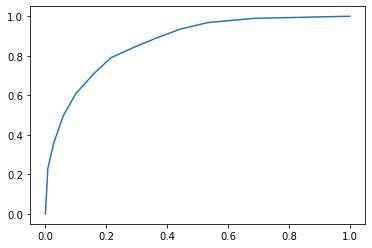

In [110]:
plt.plot(fpr,tpr)
plt.show()